In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt 
import csv
import seaborn as sns

In [234]:
df = pd.read_csv('Data.csv', encoding='latin1') 
df.head(100)


,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Company96,Success,2011,3,53.0,NaN,Enterprise Software,marketing,500 Startups|Tech Wildcatters|Start-Up Chile,8.0,...,25.50505051,12.87878788,7.323232323,4.545454545,0,0,4.545454545,0,0,3
96,Company97,Success,2012,2,504.0,NaN,NaN,social media,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
97,Company98,Success,2012,2,661.0,NaN,Real Estate,sales,Nexus Venture Partners,NaN,...,0,0,0,0,0,0,0,0,0,0
98,Company99,Success,2012,2,NaN,NaN,NaN,service,NaN,NaN,...,0,2.941176471,0,0,2.941176471,0,0,0,0,4


In [235]:
df['Percent_skill_Finance'].nunique()

30

In [236]:
df['Dependent-Company Status'].isnull().sum() #all have labels 

0

In [237]:
df['Percent_skill_Finance'].isnull().sum()#no nan values,instead the following code shows that there are "No Info" values

0

In [238]:
value_count = (df["Percent_skill_Finance"] == "No Info").sum() # 61 "No Info" values
value_count             

61

In [239]:
df_1 = df[df["Percent_skill_Finance"] == "No Info"]['Dependent-Company Status']
df_1.value_counts() 

Dependent-Company Status
Failed     58
Success     3
Name: count, dtype: int64

In [240]:
df['Dependent-Company Status'].value_counts()

Dependent-Company Status
Success    305
Failed     167
Name: count, dtype: int64

#### from the above two codes we see that failed businesses are 167 , and remove "No Info" rows which contain 58 failed data of businesses should be wrong action 


In [241]:
df['Percent_skill_Finance'].value_counts()

Percent_skill_Finance
0              360
No Info         61
11.11111111      7
2.777777778      5
5.555555556      5
7.142857143      4
5.882352941      4
16.66666667      2
1.851851852      2
4.761904762      2
37.5             1
47.05882353      1
3.333333333      1
3.571428571      1
29.41176471      1
23.80952381      1
5                1
7.407407407      1
3.03030303       1
6.666666667      1
33.33333333      1
12.5             1
41.17647059      1
27.77777778      1
14.70588235      1
78.57142857      1
10.88235294      1
36.84210526      1
4.444444444      1
9.090909091      1
Name: count, dtype: int64

In [242]:
Dependent_Company_Status = df.loc[df["Percent_skill_Finance"].isna(), "Dependent-Company Status"]
Dependent_Company_Status #no nan rows so there is nothing to show 

Series([], Name: Dependent-Company Status, dtype: object)

In [243]:
df.info() #3 ints and 5 floats. total 8 numerics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.9+ KB


In [244]:
df.describe() #as only 8 features are numeric the below table has 8 columns 

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,407.000000,306.000000,267.000000,3.120000e+02,472.000000,472.000000,472.000000,390.000000
mean,114.159705,31.408497,-1.299625,6.379489e+06,1.868644,1.016949,3.730932,2.889744
std,225.651419,62.673600,23.967085,9.901622e+06,1.143481,2.014736,2.516539,0.845765
min,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,-3.500000,4.250000,0.000000,7.500000e+05,1.000000,0.000000,2.000000,2.000000
50%,60.000000,13.000000,0.000000,2.800000e+06,2.000000,0.000000,3.000000,3.000000
75%,216.000000,31.000000,6.000000,7.850000e+06,2.250000,1.000000,5.000000,3.000000
max,1535.000000,594.000000,50.000000,7.700000e+07,7.000000,13.000000,24.000000,5.000000


In [245]:
df['Dependent-Company Status'].unique() #all have labels ,there is nothing to remove

array(['Success', 'Failed'], dtype=object)

In [246]:
df['Dependent-Company Status'].isnull().any() #to be convinced ... 

False

In [247]:
df['Dependent-Company Status'].nunique() #just fail and success 

2

In [248]:
df['Dependent-Company Status'].value_counts() #305 succeded 167 failed

Dependent-Company Status
Success    305
Failed     167
Name: count, dtype: int64

In [249]:
df['Percent_skill_Entrepreneurship'].value_counts()

Percent_skill_Entrepreneurship
0              131
No Info         61
11.11111111     30
16.66666667     19
5.555555556     19
              ... 
9.490740741      1
6.944444444      1
8.496732026      1
14.28571429      1
5.664488017      1
Name: count, Length: 93, dtype: int64

In [250]:
df['Percent_skill_Consulting'].value_counts() #looks like assymetric feature. what to do with them ?

Percent_skill_Consulting
0              379
No Info         61
5.882352941      4
2.777777778      3
5                3
11.11111111      2
16.66666667      2
1.851851852      2
6.25             1
5.263157895      1
4.444444444      1
3.333333333      1
11.76470588      1
6.666666667      1
3.571428571      1
3.125            1
20               1
2.380952381      1
8.333333333      1
3.846153846      1
4.545454545      1
5.409356725      1
1.111111111      1
1.960784314      1
Name: count, dtype: int64

In [251]:
df.isnull().sum()   

Company_Name                 0
Dependent-Company Status     0
year of founding             0
Age of company in years     44
Internet Activity Score     65
                            ..
Percent_skill_Law            0
Percent_skill_Consulting     0
Percent_skill_Finance        0
Percent_skill_Investment     0
Renown score                 0
Length: 116, dtype: int64

In [252]:
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


In [253]:
df['year of founding'].dtype   
df['Percent_skill_Data Science'].dtype #there are numeric values which are still object dtype 

dtype('O')

In [254]:
df['year of founding'].dtype
df['Age of company in years'].dtype #both are aobect dtype,to count corr it is required to alter dtype

dtype('O')

In [255]:
df['year of founding'] = pd.to_numeric(df['year of founding'], errors='coerce')  # Convert to int
df['Age of company in years'] = pd.to_numeric(df['Age of company in years'],errors='coerce') 

In [256]:
df['year of founding'].corr(df['Age of company in years'])

-0.9999999999999984

In [257]:
#above we see that 'Age of company in years' and 'year of founding' are. highly correlated 
#so we can drop(remove) one of them. 

In [258]:
df['Age of company in years'].isna().sum()

59

In [259]:
df['year of founding'].isna().sum() 

59

In [260]:
#both columns have exactly 59 nan values. i assume that they correspond to each other.howeveer let's check...

In [261]:
nan_year_of_founding= df['year of founding'].isna()
nan_Age_of_company_in_years = df['Age of company in years'].isna()
nan_correlation = nan_year_of_founding == nan_Age_of_company_in_years
nan_correlation.value_counts() #all values are true ,so 
# means that the positions of NaN values in both Column1 and Column2 are exactly the same

True    472
Name: count, dtype: int64

In [262]:
dict = pd.read_csv('dictionary.csv')
dict

,Variable,Description
0,Company_Name,NaN
1,Dependent-Company Status,Dependent variable indicating if company succe...
2,year of founding,NaN
3,Age of company in years,NaN
4,Internet Activity Score,How much company is acgtive on social media
...,...,...
111,Percent_skill_Law,for founders & cofounders
112,Percent_skill_Consulting,for founders & cofounders
113,Percent_skill_Finance,for founders & cofounders
114,Percent_skill_Investment,for founders & cofounders


In [263]:
dict.dropna(axis = "index")


,Variable,Description
1,Dependent-Company Status,Dependent variable indicating if company succe...
4,Internet Activity Score,How much company is acgtive on social media
8,Investors,List of investors
24,Number of of repeat investors,Number of investors who invested multiple times
27,Average size of companies worked for in the past,for founders & cofounders
28,Have been part of startups in the past?,for founders & cofounders
29,Have been part of successful startups in the p...,for founders & cofounders
30,Was he or she partner in Big 5 consulting?,for founders & cofounders
31,Consulting experience?,for founders & cofounders
57,Exposure across the globe,for founders & cofounders


In [264]:
df['Average size of companies worked for in the past'].unique()

array(['Small', 'Large', 'Medium', 'No Info'], dtype=object)

In [265]:
df['Average size of companies worked for in the past'].value_counts() #assume here 'no info' can be replaced by 'medium'

Average size of companies worked for in the past
Small      228
Medium     130
Large       83
No Info     31
Name: count, dtype: int64

In [266]:
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,NaN,NaN,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011.0,3.0,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011.0,3.0,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009.0,5.0,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010.0,4.0,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(7), int64(3), object(106)
memory usage: 427.9+ KB


In [268]:
df.dtypes

Company_Name                 object
Dependent-Company Status     object
year of founding            float64
Age of company in years     float64
Internet Activity Score     float64
                             ...   
Percent_skill_Law            object
Percent_skill_Consulting     object
Percent_skill_Finance        object
Percent_skill_Investment     object
Renown score                 object
Length: 116, dtype: object

In [269]:
df['Renown score'].dtype


dtype('O')

In [270]:
df['Internet Activity Score'].dtype

dtype('float64')

In [271]:
df.shape

(472, 116)

In [272]:
df.ndim

2

In [273]:
df.size

54752

In [274]:
df.duplicated(subset=None, keep='first').value_counts()
#check duplicates by rows

False    472
Name: count, dtype: int64

In [275]:
#df.drop('Company_Name',axis = 1) 

df_cleaned = df.loc[:, ~df.T.duplicated()]
df_cleaned.shape
#check duplicates by column 


(472, 116)

In [276]:
#still 116 , means no duplicate column.

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(7), int64(3), object(106)
memory usage: 427.9+ KB


/Users/aramkarakhanyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


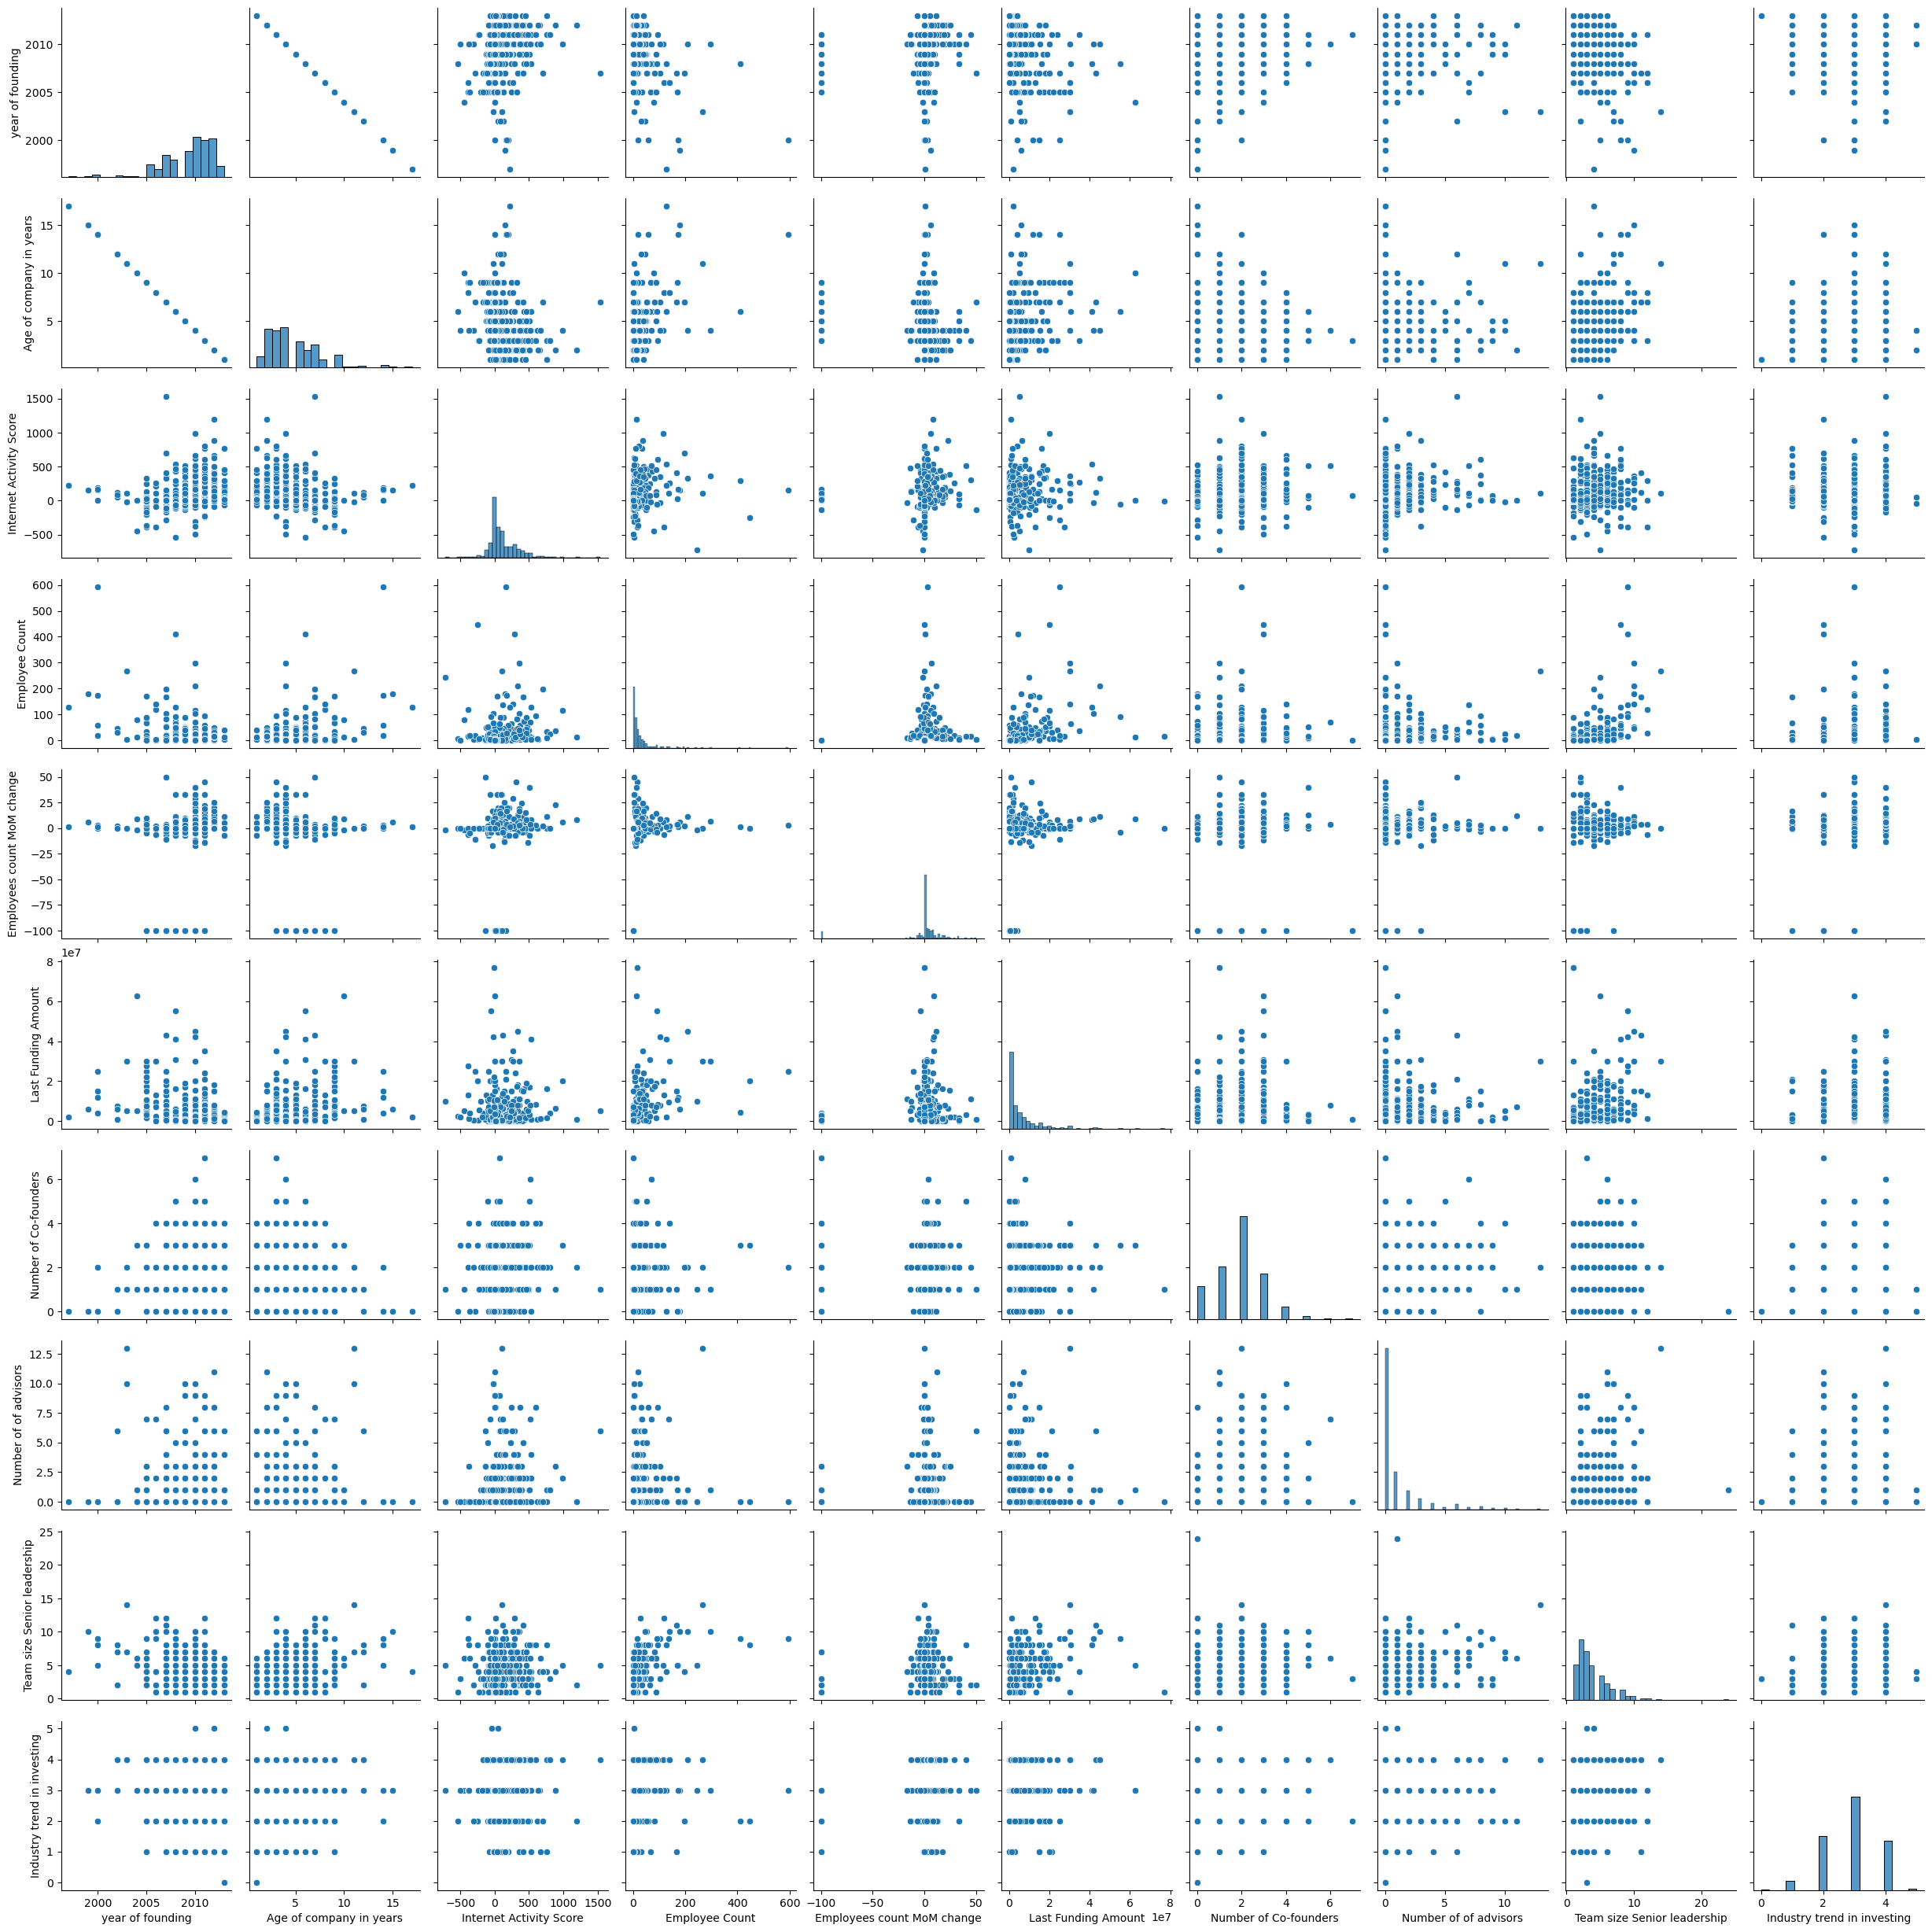

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)


In [279]:
#above again we see that 'age of company in years' and 'year of funding' are strongly correlated.

In [280]:
numeric_df = df.select_dtypes(include = ['float64','int64'])
non_numeric_df = df.select_dtypes(exclude =['float64','int64'])

In [281]:
numeric_df.head()

,year of founding,Age of company in years,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
0,NaN,NaN,-1.0,3.0,0.0,450000.0,1,2,2,2.0
1,2011.0,3.0,125.0,NaN,NaN,NaN,2,0,4,3.0
2,2011.0,3.0,455.0,14.0,0.0,2350000.0,3,0,7,3.0
3,2009.0,5.0,-99.0,45.0,10.0,10250000.0,2,0,4,4.0
4,2010.0,4.0,496.0,39.0,3.0,5500000.0,1,1,8,3.0


In [282]:
corr_matrix = numeric_df.corr()
corr_matrix

,year of founding,Age of company in years,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
year of founding,1.000000,-1.000000,0.215869,-0.396640,0.095640,-0.275466,0.229339,-0.042000,-0.280334,-0.009382
Age of company in years,-1.000000,1.000000,-0.215869,0.396640,-0.095640,0.275466,-0.229339,0.042000,0.280334,0.009382
Internet Activity Score,0.215869,-0.215869,1.000000,0.100511,0.141396,0.029657,0.139881,0.089105,0.105978,0.041369
Employee Count,-0.396640,0.396640,0.100511,1.000000,0.098178,0.371511,-0.021549,0.091659,0.497193,0.043491
Employees count MoM change,0.095640,-0.095640,0.141396,0.098178,1.000000,0.120823,0.024138,0.080929,0.139582,0.199115
Last Funding Amount,-0.275466,0.275466,0.029657,0.371511,0.120823,1.000000,0.013045,0.101469,0.376896,0.132535
Number of Co-founders,0.229339,-0.229339,0.139881,-0.021549,0.024138,0.013045,1.000000,0.106028,0.138206,0.121460
Number of of advisors,-0.042000,0.042000,0.089105,0.091659,0.080929,0.101469,0.106028,1.000000,0.303241,0.095711
Team size Senior leadership,-0.280334,0.280334,0.105978,0.497193,0.139582,0.376896,0.138206,0.303241,1.000000,0.166963
Industry trend in investing,-0.009382,0.009382,0.041369,0.043491,0.199115,0.132535,0.121460,0.095711,0.166963,1.000000


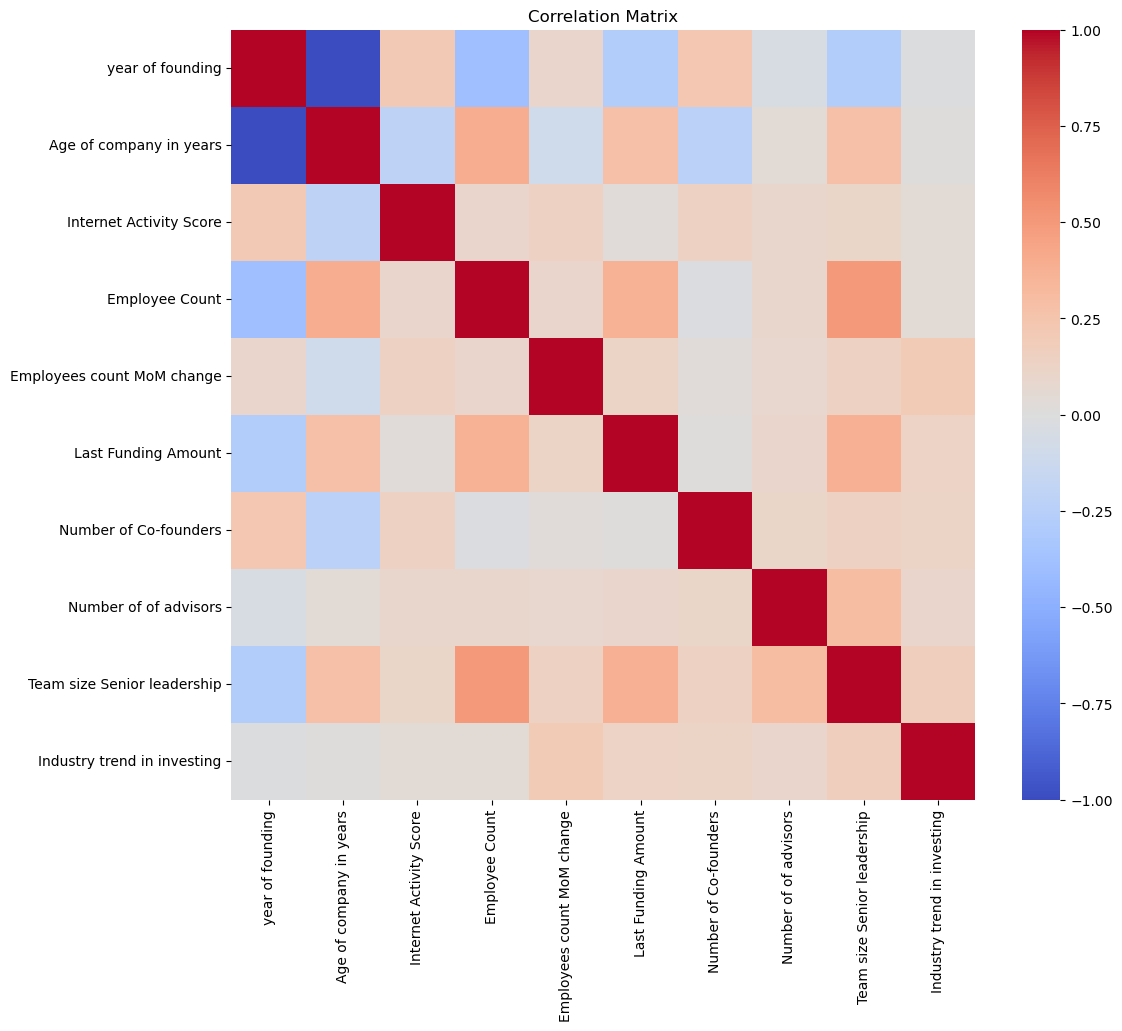

In [283]:

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [284]:
df['Employee Count'].corr(df['Team size Senior leadership'])

0.4971928087809883

In [285]:
#hence there is some ,but still not too strong  correration between any pair of numberic matrices(except  'age of company in years' and 'year of funding' are strongly correlated.)

## drop according to columns

In [286]:
nan_counts = df.isna().sum()

# Define a function to display NaN counts in chunks with column indices
def display_nan_counts_with_indices(series, chunk_size=20):
    num_columns = len(series)
    for start in range(0, num_columns, chunk_size):
        end = min(start + chunk_size, num_columns)
        print(f"Columns {start + 1} to {end} (Index {start} to {end - 1}):\n")
        for i in range(start, end):
            print(f"Index {i}: {series.index[i]} - {series.iloc[i]} NaN values")
        print("\n" + "-" * 50 + "\n")

# Display NaN counts in chunks of 20
display_nan_counts_with_indices(nan_counts, chunk_size=20)

Columns 1 to 20 (Index 0 to 19):

Index 0: Company_Name - 0 NaN values
Index 1: Dependent-Company Status - 0 NaN values
Index 2: year of founding - 59 NaN values
Index 3: Age of company in years - 59 NaN values
Index 4: Internet Activity Score - 65 NaN values
Index 5: Short Description of company profile - 149 NaN values
Index 6: Industry of company - 124 NaN values
Index 7: Focus functions of company - 30 NaN values
Index 8: Investors - 140 NaN values
Index 9: Employee Count - 166 NaN values
Index 10: Employees count MoM change - 205 NaN values
Index 11: Has the team size grown - 50 NaN values
Index 12: Est. Founding Date - 109 NaN values
Index 13: Last Funding Date - 122 NaN values
Index 14: Last Funding Amount - 160 NaN values
Index 15: Country of company - 71 NaN values
Index 16: Continent of company - 71 NaN values
Index 17: Number of Investors in Seed - 0 NaN values
Index 18: Number of Investors in Angel and or VC - 0 NaN values
Index 19: Number of Co-founders - 0 NaN values

---

In [287]:
df.iloc[:,:20]

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders
0,Company1,Success,NaN,NaN,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,0.0,No,NaN,5/26/2013,450000.0,United States,North America,2,0,1
1,Company2,Success,2011.0,3.0,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,NaN,No,NaN,NaN,NaN,United States,North America,5,0,2
2,Company3,Success,2011.0,3.0,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,0.0,No,12/1/2011,10/23/2013,2350000.0,United States,North America,15,0,3
3,Company4,Success,2009.0,5.0,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,10.0,No,6/20/2009,5/10/2012,10250000.0,United States,North America,6,0,2
4,Company5,Success,2010.0,4.0,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,3.0,No,4/1/2010,12/11/2013,5500000.0,United States,North America,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,Failed,2011.0,3.0,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,NaN,No,3/1/2011,NaN,NaN,United States,North America,0,0,0
468,Company469,Failed,NaN,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,0,4,0
469,Company470,Failed,2010.0,4.0,0.0,Real Time Social Media Analytics,Analytics|E-Commerce,CAMPAIGN MANAGEMENT,NaN,0.0,NaN,NaN,5/1/2010,NaN,NaN,United States,North America,No Info,No Info,2
470,Company471,Failed,2009.0,5.0,0.0,Social Media Publishing and Analytics,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,NaN,NaN,10/1/2009,2/1/2010,100000.0,United States,North America,No Info,No Info,3


In [288]:
df.iloc[:,:20]
df = df.drop(['year of founding','Company_Name','Short Description of company profile','Investors',
             'Continent of company','Last Funding Date','Last Funding Amount'],axis = 1)                      

In [289]:
start_col = df.columns.get_loc("Number of Co-founders")
df.iloc[:,start_col:start_col + 20]

,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?
0,1,2,2,15,Yes,4,Nothing,No,Small,No,No,No,No,Service,No,Private,No,Both,Yes,Platform
1,2,0,4,20,No,0,medium,Yes,Large,Yes,Yes,No,No,Product,No,Public,Yes,Both,No,Platform
2,3,0,7,10,No,0,low,Yes,Medium,No,No,No,No,Both,Yes,Private,Yes,Both,Yes,cloud
3,2,0,4,50,Yes,0,low,No,Large,Yes,Yes,No,No,Product,Yes,Public,Yes,Structured,Yes,Platform
4,1,1,8,40,No,0,high,No,Small,No,No,No,No,Product,Yes,Public,Yes,Both,No,Platform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0,0,1,No Info,No,0,No Info,No Info,No Info,No Info,No Info,No Info,No Info,Product,Yes,no,No,Structured,No,No Info
468,0,0,1,No Info,No,0,No Info,No Info,No Info,No Info,No Info,No Info,No Info,Service,No,no,No,Structured,No,Platform
469,2,0,1,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,Service,No,Public,No,Structured,Yes,Both
470,3,2,1,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,Service,Yes,Public,No,Structured,Yes,Both


In [290]:
df["Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?"].value_counts()

#nothing to remove from these 20 columns

Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?
Low        243
No Info     80
Medium      78
High        28
Name: count, dtype: int64

In [291]:
start_col = df.columns.get_loc('Cloud or platform based serive/product?')
df.iloc[:,start_col:start_col+20]

,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe
0,Platform,Global,Linear,Yes,NaN,No,No,No,No,No,No,No,No,No,Yes,Online,B2C,High,High,Yes
1,Platform,Local,Non-Linear,No,Few,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Online,B2C,Low,High,Yes
2,cloud,Local,Non-Linear,No,Few,No,No,No,Yes,No,No,Yes,No,No,No,Online,B2B,Low,Medium,Yes
3,Platform,Local,Non-Linear,No,Few,Yes,No,No,No,No,No,No,No,No,No,Online,B2C,Medium,Medium,Yes
4,Platform,Local,Non-Linear,Yes,Few,No,No,No,No,No,No,Yes,No,No,No,Online,B2B,Low,High,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,No Info,local,Non-Linear,No,No Info,No,No,No,No,No,No Info,No,No,No,Yes,Online,B2B,No Info,No Info,No Info
468,Platform,global,Linear,Yes,No Info,No,No,No,No,No,No Info,No,No,No,Yes,Online,B2C,No Info,No Info,No Info
469,Both,GLOBAL,Non-Linear,No,No Info,No,No,Yes,Yes,No,No,Yes,No,No,No,Online,B2B,No Info,No Info,No Info
470,Both,GLOBAL,Linear,No,No Info,No,No,Yes,Yes,No,No,No,No,No,No,Online,B2C,No Info,No Info,No Info


In [292]:
#nothing to remove

In [293]:
start_col = df.columns.get_loc('Exposure across the globe')
df.iloc[:,start_col:start_col+20].head()

,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy
0,Yes,Low,Masters,21,business,Yes,Yes,Tier_1,500,Medium,0,0,0,NaN,0,NaN,0,Low,Low,Yes
1,Yes,High,Masters,21,Supply Chain Management & Entrepreneurship,Yes,Yes,Tier_1,500,High,0,0,0,Medium,13,NaN,34,High,Medium,Yes
2,Yes,Low,Bachelors,18,General,Yes,Yes,Tier_2,500,High,0,0,1,Medium,18,NaN,36,High,Medium,Yes
3,Yes,Low,Bachelors,18,Computer Systems Engineering,Yes,Yes,Tier_2,No Info,Low,0,0,0,Medium,2,NaN,15.5,Medium,Medium,Yes
4,Yes,Medium,Bachelors,18,Industrial Engineering and Computer Science,Yes,Yes,NaN,500,High,0,0,0,Low,5,Few,23,Medium,Medium,Yes


In [294]:
df = df.drop(['Specialization of highest education','Degree from a Tier 1 or Tier 2 university?','Number of  of Research publications'],
             axis = 1)

In [295]:
start_col = df.columns.get_loc('Pricing Strategy')
df.iloc[:,start_col:start_col+20].head()

,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD)
0,Yes,No,High,No Info,No,No,Yes,No,No,No,No Info,9626884,No,Yes,No,2.0,Low,0,1.5,0.45
1,Yes,No,Low,No Info,No,Yes,Yes,No,No,Yes,Medium,1067034,Yes,Yes,No,3.0,Medium,0,6.666666667,5
2,Yes,No,Low,No Info,Yes,Yes,Yes,No,No,No,Low,71391,Yes,Yes,Yes,3.0,Medium,0,3.333333333,2.35
3,Yes,No,Low,Good,No,Yes,Yes,No,No,No,Low,11847,No,Yes,Yes,4.0,Medium,2,10,10.25
4,Yes,No,Low,Bad,Yes,Yes,Yes,No,No,No,Low,201814,Yes,Yes,No,3.0,Medium,0,10,5.5


In [296]:
df = df.drop('Industry trend in investing',axis =1)

In [297]:
start_col = df.columns.get_loc('Last round of funding received (in milionUSD)')
df.iloc[:,start_col:].head()

,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,0.45,No Info,No Info,11.56,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,Not Applicable,10,9,Trough,2 to 5,15.88235294,11.76470588,15,12.94117647,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,2.35,Not Applicable,2,7.344444444,Trough,2 to 5,9.401709402,0,57.47863248,0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,10.25,Not Applicable,1,8.7,Trough,2 to 5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,5.5,Not Applicable,13,9.822222222,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [298]:
df = df.drop('Gartner hype cycle stage',axis = 1)

In [299]:
df.shape


(472, 104)

# drop according to rows

In [300]:
df.replace('No Info', np.nan, inplace=True)
nan_mask = df.isna()
nan_mask.shape      

(472, 104)

In [301]:
df["Country of company"].value_counts() #assume this column also may be removed...

Country of company
United States         305
United Kingdom         33
India                  10
France                  8
Germany                 6
Belgium                 5
Spain                   5
Israel                  4
Denmark                 3
Bulgaria                3
Canada                  3
Austria                 2
Finland                 2
Switzerland             2
Argentina               2
Azerbaijan              2
Singapore               1
Italy                   1
Czech Republic          1
Russian Federation      1
Estonia                 1
Sweden                  1
Name: count, dtype: int64

In [302]:


# Count the number of NaN values in each row
nan_count = df.isna().sum(axis=1)

# Add this count as a new column for reference (optional)
df['NaN_Count'] = nan_count

# Find the rows with the most NaN values
most_nan_rows = df.loc[nan_count.nlargest(20).index]  # Adjust `5` for the top N rows

# Display the rows with the most NaN values
most_nan_rows    

/var/folders/64/0_lt6ygn0vv2txcvkylzlgv00000gn/T/ipykernel_3455/1787490504.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['NaN_Count'] = nan_count


,Dependent-Company Status,Age of company in years,Internet Activity Score,Industry of company,Focus functions of company,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Country of company,...,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,NaN_Count
423,Failed,NaN,1.0,NaN,NaN,1.0,0.0,NaN,NaN,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94
424,Failed,NaN,-3.0,Advertising|Analytics,NaN,NaN,NaN,NaN,NaN,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94
458,Failed,NaN,1.0,Transportation,NaN,1.0,0.0,NaN,NaN,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94
426,Failed,3.0,-228.0,E-Commerce,NaN,6.0,0.0,NaN,1/1/2011,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91
427,Failed,7.0,-2.0,NaN,NaN,NaN,NaN,NaN,1/1/2007,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
425,Failed,6.0,-89.0,E-Commerce|Food & Beverages,NaN,6.0,0.0,No,8/1/2008,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
422,Failed,NaN,NaN,NaN,Sales & Marketing,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
429,Failed,NaN,7.0,Social Networking,NaN,NaN,NaN,NaN,NaN,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
470,Failed,5.0,0.0,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,NaN,10/1/2009,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
401,Failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70


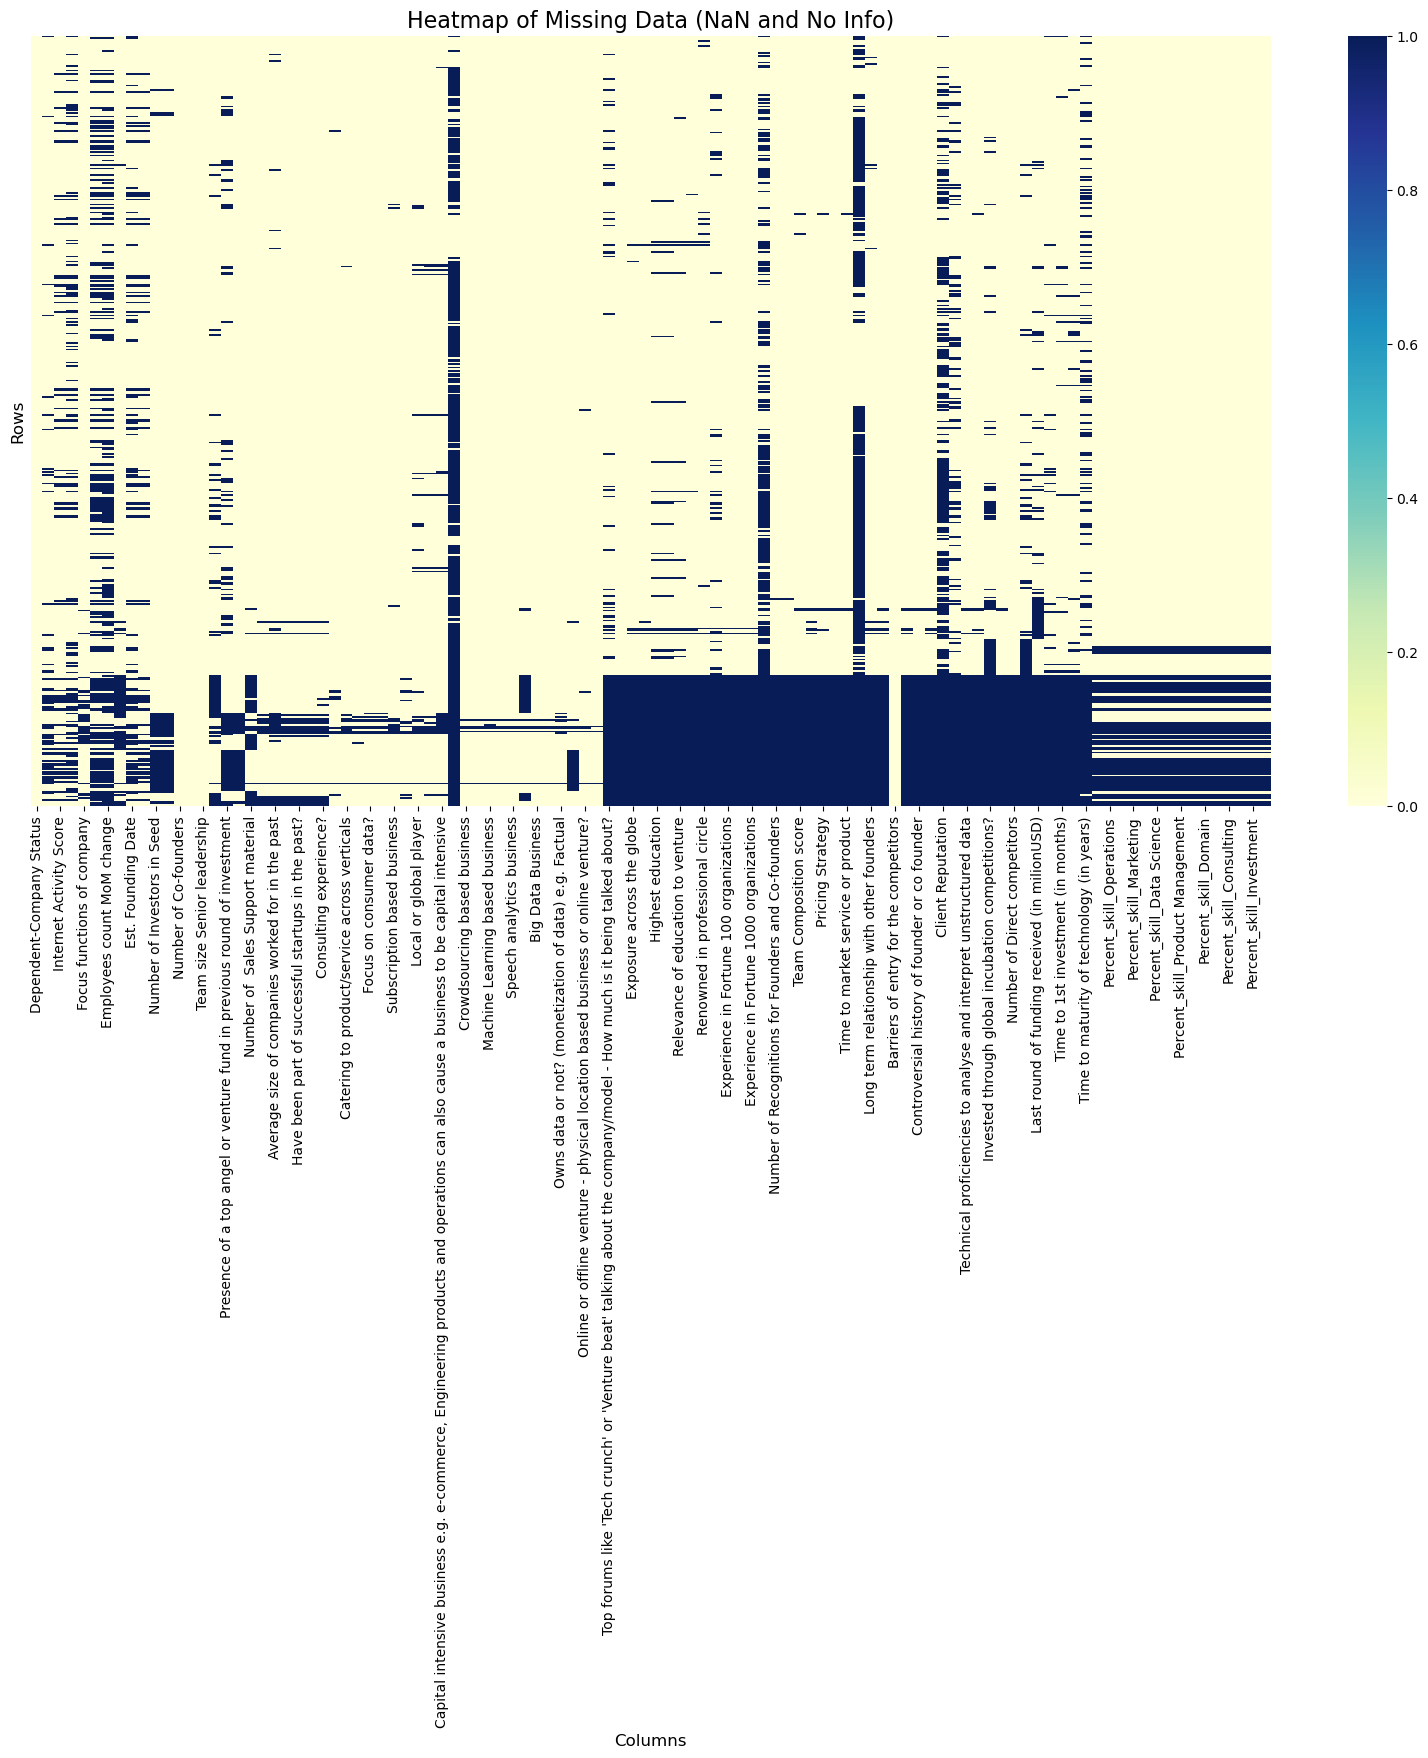

In [303]:
plt.figure(figsize=(20, 10))  # Adjust size as needed
sns.heatmap(nan_mask, cbar=True, cmap="YlGnBu", yticklabels=False)

plt.title('Heatmap of Missing Data (NaN and No Info)', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.show()

In [304]:

# Count the number of NaN values in each row
nan_count = df.isna().sum(axis=1)

# Count rows where the NaN count is greater than 80
rows_with_more_than_80_nan = (nan_count > 50).sum()

print(f"Number of rows with more than 60 NaN values: {rows_with_more_than_80_nan}")


Number of rows with more than 60 NaN values: 67


In [305]:
# Filter out rows where the count of NaN values is greater than 50
df_cleaned = df[nan_count <= 50]

# Optionally reset the index of the resulting DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

print(f"Original DataFrame had {len(df)} rows.")
print(f"Cleaned DataFrame has {len(df_cleaned)} rows.")
df = df_cleaned

Original DataFrame had 472 rows.
Cleaned DataFrame has 405 rows.


In [306]:
df_cleaned.shape

(405, 105)

In [307]:
df['Dependent-Company Status'].value_counts()

Dependent-Company Status
Success    305
Failed     100
Name: count, dtype: int64

In [308]:
nan_mask_new = df.isna()
nan_mask_new.shape

(405, 105)

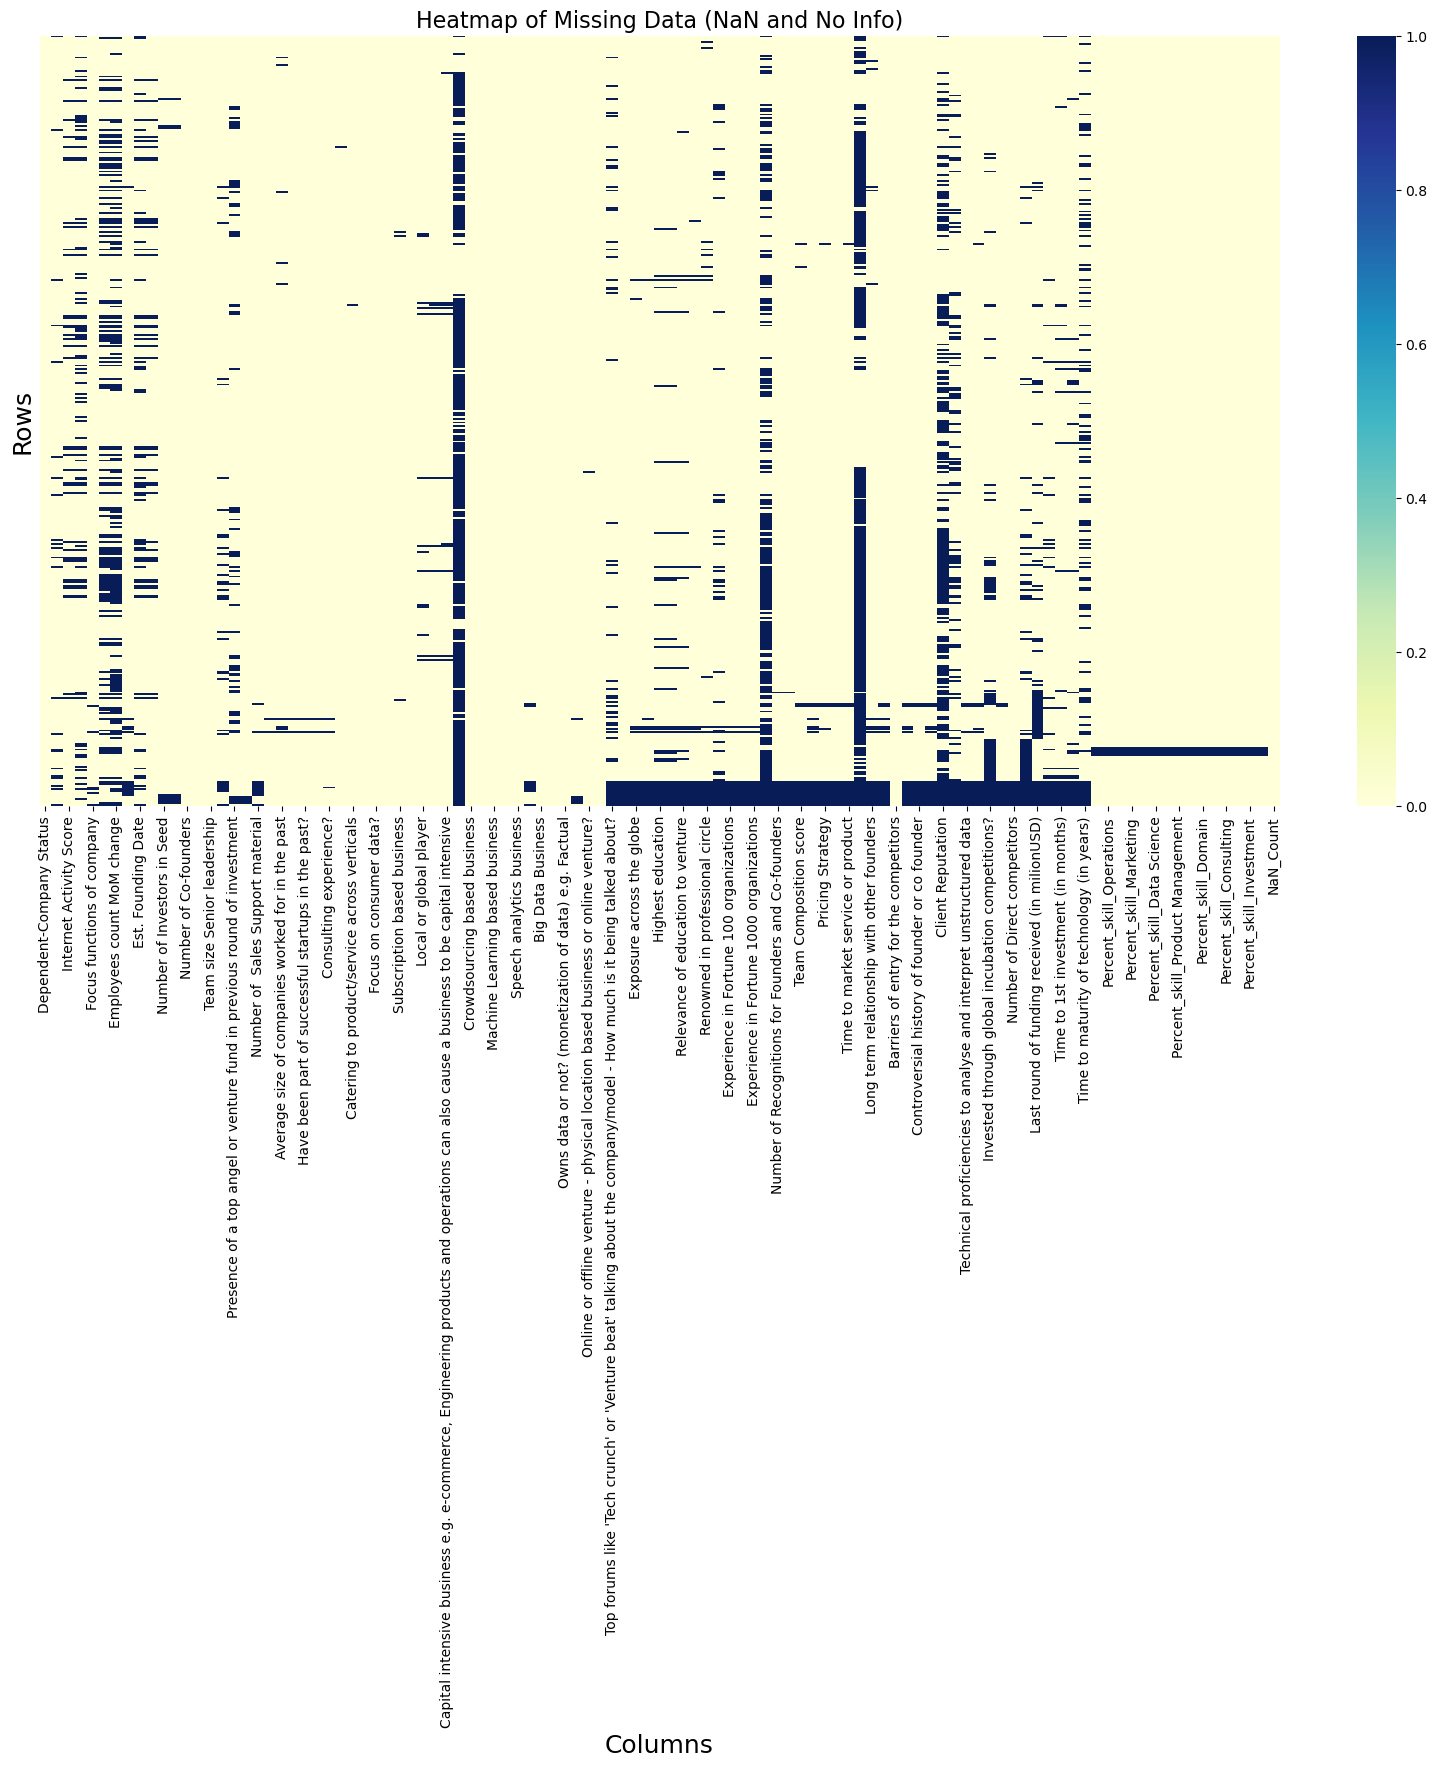

In [310]:
plt.figure(figsize=(20, 10))
sns.heatmap(nan_mask_new, cbar=True, cmap="YlGnBu", yticklabels=False)

plt.title('Heatmap of Missing Data (NaN and No Info)', fontsize=16)
plt.xlabel('Columns', fontsize=18)
plt.ylabel('Rows', fontsize=18)
plt.show()

In [311]:
df.sort_values(by='NaN_Count', ascending=False).head(40)

,Dependent-Company Status,Age of company in years,Internet Activity Score,Industry of company,Focus functions of company,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Country of company,...,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,NaN_Count
396,Failed,NaN,-58.0,NaN,NaN,4.0,NaN,NaN,NaN,United States,...,0,0,0,0,0,0,0,0,1,50
404,Failed,NaN,-30.0,Music,NaN,NaN,NaN,No,NaN,United States,...,22.22222222,11.11111111,22.22222222,0,0,0,0,0,0,49
403,Failed,8.0,0.0,Gaming,Marketing,NaN,NaN,No,4/1/2006,United States,...,3.846153846,0,0,23.31730769,0,0,0,0,8,48
393,Failed,9.0,46.0,NaN,search,NaN,NaN,NaN,4/7/2005,United States,...,25,4.166666667,0,25,0,0,0,0,7,48
392,Failed,8.0,0.0,Advertising,advertising,NaN,NaN,NaN,3/23/2006,United States,...,16.66666667,5.555555556,22.22222222,0,0,0,0,0,5,47
395,Failed,6.0,-12.0,Social Networking|Music|Entertainment|Media,NaN,1.0,0.0,NaN,1/1/2008,United States,...,18.18181818,9.090909091,9.090909091,0,0,0,0,0,0,47
394,Failed,NaN,-7.0,Music|Mobile,entertainment,16.0,0.0,NaN,NaN,United States,...,33.33333333,0,5.555555556,8.333333333,0,0,0,0,5,47
401,Failed,6.0,-62.0,NaN,operations,4.0,33.0,No,1/1/2008,United States,...,6.25,0,0,0,0,0,0,6.25,1,47
397,Failed,3.0,-4.0,Network / Hosting / Infrastructure|Telecommuni...,billing,0.0,NaN,NaN,8/1/2011,United States,...,0,6.25,0,0,0,0,0,0,4,46
400,Failed,4.0,30.0,Gaming|Entertainment|Mobile,Operations,0.0,-100.0,No,1/1/2010,United States,...,0,0,0,0,0,0,0,0,2,46


In [312]:
df.head()

,Dependent-Company Status,Age of company in years,Internet Activity Score,Industry of company,Focus functions of company,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Country of company,...,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,NaN_Count
0,Success,NaN,-1.0,NaN,operation,3.0,0.0,No,NaN,United States,...,0,0,0,0,0,0,0,0,0,10
1,Success,3.0,125.0,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,No,NaN,United States,...,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8,4
2,Success,3.0,455.0,Analytics|Cloud Computing|Software Development,operations,14.0,0.0,No,12/1/2011,United States,...,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9,1
3,Success,5.0,-99.0,Mobile|Analytics,Marketing & Sales,45.0,10.0,No,6/20/2009,United States,...,0,0,0,0,0,0,0,0,5,1
4,Success,4.0,496.0,Analytics|Marketing|Enterprise Software,Marketing & Sales,39.0,3.0,No,4/1/2010,United States,...,0,0,0,0,0,0,0,0,6,1


## again trying to drop by column 

In [314]:
# Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Sort columns by the number of NaN values in descending order
nan_counts_sorted = nan_counts.sort_values(ascending=False)

# Display the top columns with the most NaN values
print("Columns with the most NaN values:")
print(nan_counts_sorted.head(10))  # Adjust the number to show more or fewer columns


Columns with the most NaN values:
Number of  of Partners of company            318
Employee benefits and salary structures      284
Top management similarity                    215
Client Reputation                            207
Employees count MoM change                   156
Employee Count                               119
Time to maturity of technology (in years)    106
Industry of company                           88
google page rank of company website           87
Est. Founding Date                            73
dtype: int64


In [315]:
# Count the number of NaN values in each column
#nan_counts = df.isna().sum()

# Identify the top 10 columns with the most NaN values
columns_to_drop = nan_counts.nlargest(5).index

# Drop those columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned                                   

,Dependent-Company Status,Age of company in years,Internet Activity Score,Industry of company,Focus functions of company,Employee Count,Has the team size grown,Est. Founding Date,Country of company,Number of Investors in Seed,...,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,NaN_Count
0,Success,NaN,-1.0,NaN,operation,3.0,No,NaN,United States,2,...,0,0,0,0,0,0,0,0,0,10
1,Success,3.0,125.0,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,No,NaN,United States,5,...,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8,4
2,Success,3.0,455.0,Analytics|Cloud Computing|Software Development,operations,14.0,No,12/1/2011,United States,15,...,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9,1
3,Success,5.0,-99.0,Mobile|Analytics,Marketing & Sales,45.0,No,6/20/2009,United States,6,...,0,0,0,0,0,0,0,0,5,1
4,Success,4.0,496.0,Analytics|Marketing|Enterprise Software,Marketing & Sales,39.0,No,4/1/2010,United States,7,...,0,0,0,0,0,0,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Failed,4.0,30.0,Gaming|Entertainment|Mobile,Operations,0.0,No,1/1/2010,United States,NaN,...,0,0,0,0,0,0,0,0,2,46
401,Failed,6.0,-62.0,NaN,operations,4.0,No,1/1/2008,United States,NaN,...,6.25,0,0,0,0,0,0,6.25,1,47
402,Failed,3.0,-72.0,E-Commerce,Marketing,3.0,No,1/1/2011,United States,NaN,...,0,0,0,0,0,0,0,0,4,46
403,Failed,8.0,0.0,Gaming,Marketing,NaN,No,4/1/2006,United States,NaN,...,3.846153846,0,0,23.31730769,0,0,0,0,8,48


In [316]:
df = df_cleaned
df.shape

(405, 100)

In [317]:
#rule of thumb suggests every feature should have 10 observation for model performing,so in our case
#for 472 observations we can leave 47 features out of 116.in models like d-trees or random_forest number 
#of features can be much more